# Image Classification using Deep learning Model (CNN)


### 1. Installing Dependencies and Setup

In [1]:
#  !pip install tensorflow tensorflow-gpu opencv-python matplotlib

### 2. Importing Dependencies 

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
import os

### 3. We need to control the memory growth in GPU so that the model does not consume all the GPU memory

In [3]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices("GPU")
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

### 4. Remove dodgy Images

In [4]:
import cv2 
import imghdr

C:\Users\Dell\AppData\Local\Temp\ipykernel_14888\4067517781.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [5]:
data_dir = "Data"
image_exts = ['jpg', 'jpeg', 'png', 'bmp']

In [6]:
image = os.listdir(data_dir)
print(image)

['Happy', 'Sad']


In [7]:
image = os.listdir(os.path.join(data_dir,"Happy"))
print(image)

['05-12-21-happy-people.jpg', '1000_F_42220133_toAU6USGY9jVr2XJFLssfG00cSYIJ173.jpg', '11-Habits-of-Supremely-Happy-People-1.jpg', '170404-happy-workers-feature.jpg', '1920px-face-smile.svg_.png', '1HEoLBLidT2u4mhJ0oiDgig.png', '20150413185238-secrets-happy-entrepreneurs-woman-gratitude-rainbow-.jpeg', '35438_hd.jpg', '360_F_165246984_Ihe5LVattiq8zEPivcPqrtM85x7noWJw.jpg', '360_F_237330799_fynB7PDF8qXuq2qYTEKOa6E0Lt8Vbzv6.jpg', '360_F_313450534_bHkt5SoetREYpgWO5uOpceVnaDCngOX7.jpg', '360_F_484873483_hg1ofIdXbMha5lKEDG3hJBrwKh1oikTq.jpg', '4239f3d51d092f69d529f372a37b4601.jpg', '5400ea_cd54b25fdd2a4216819fe49413f0c976mv2.png', '56f455011e0000b300705475.jpeg', '7-Habits-of-Happy-People-image.jpeg', '7-principles-of-successful-and-happy-people.png', '71hBPTAhIXL._AC_UF10001000_QL80_.jpg', '7VR73K6EP5ETVEOUFANWBUYJEQ.jpg', '960x0.jpg', 'aecd7b04-bb40-42ad-9985-d63a3198a878.jpg', 'AF2bZyi9j5BOTeli5cx9NIfeeLhZnsNv3dXkpteLONlB0jnIIZws64-c-mo.jpg', 'A_Sep20_14_1189155141.jpg', 'business-people

In [8]:
image_path = os.path.join(data_dir, "Happy", "images35.jpg")
print(image_path)

Data\Happy\images35.jpg


In [9]:
img = cv2.imread(os.path.join("Data", "Happy", "Super-Happy-People-yay.jpg"))
print (img.shape)
# cv2.imread reads a numpy data representation of the image . 

(1050, 1680, 3)


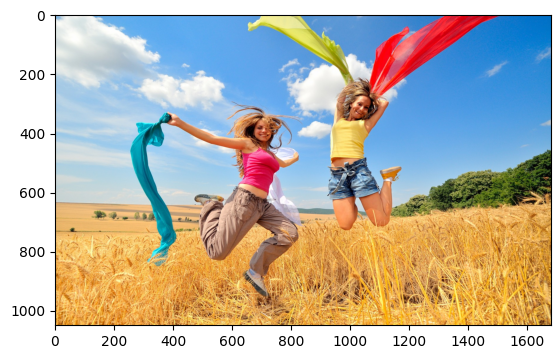

In [10]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [11]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)  # reading the image  as numpy array
            tip = imghdr.what(image_path) # checking the extension of data
            if tip not in image_exts:
                print("Image not in ext list{}".format(image_path))
                os.remove(image_path)
        except Exception as e :
            print("Issue with image {}".format(image_path))
    

### 5. Load Datas

In [12]:
tf.keras.utils.image_dataset_from_directory??

Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
)
Source:   
@keras_export(
    "keras.utils.image_dataset_from_directory",
    "keras.preprocessing.image_dataset_from_directory",
    v1=[],
)
def image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
):
    """Generates a `tf.data.Dataset` from image files in a directory.

    If your directory structure is:



In [13]:
data = tf.keras.utils.image_dataset_from_directory("Data")
#this will suffle all the data , resize all the image  to (256*25683) means all image of pizel height, width 256, make batch of 32, and also  label each 0 and 1 

Found 379 files belonging to 2 classes.


In [14]:
print(data)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [15]:
data_iterator = data.as_numpy_iterator()
print(data_iterator)

In [16]:
# this is one batch of data. gives new batch each time
batch = data_iterator.next()
print(batch)

(array([[[[128.11133  ,  82.11133  ,  46.11133  ],
         [132.16992  ,  87.16992  ,  48.16992  ],
         [133.24023  ,  88.240234 ,  49.240234 ],
         ...,
         [ 56.61133  ,  47.36133  ,  49.86133  ],
         [ 63.041016 ,  47.541016 ,  47.371094 ],
         [ 77.90039  ,  57.38086  ,  53.640625 ]],

        [[131.96094  ,  85.96094  ,  49.960938 ],
         [133.4414   ,  88.44141  ,  49.441406 ],
         [138.31445  ,  93.31445  ,  54.314453 ],
         ...,
         [ 66.947266 ,  57.697266 ,  60.197266 ],
         [ 70.77539  ,  55.27539  ,  55.27539  ],
         [ 83.07422  ,  64.05469  ,  60.04492  ]],

        [[131.75586  ,  85.75586  ,  49.75586  ],
         [141.45703  ,  96.45703  ,  57.45703  ],
         [140.49414  ,  95.49414  ,  56.49414  ],
         ...,
         [ 82.41406  ,  73.16406  ,  75.66406  ],
         [ 83.51367  ,  70.01367  ,  69.26367  ],
         [ 92.359375 ,  76.16406  ,  73.36328  ]],

        ...,

        [[125.15039  , 103.353516 ,  

In [17]:
print(batch[0].shape)
print(batch[1].shape)
print(batch[1])

(32, 256, 256, 3)
(32,)
[0 1 0 1 1 1 0 1 0 1 1 0 0 1 1 1 1 0 0 1 0 1 0 1 0 0 1 0 1 0 1 0]


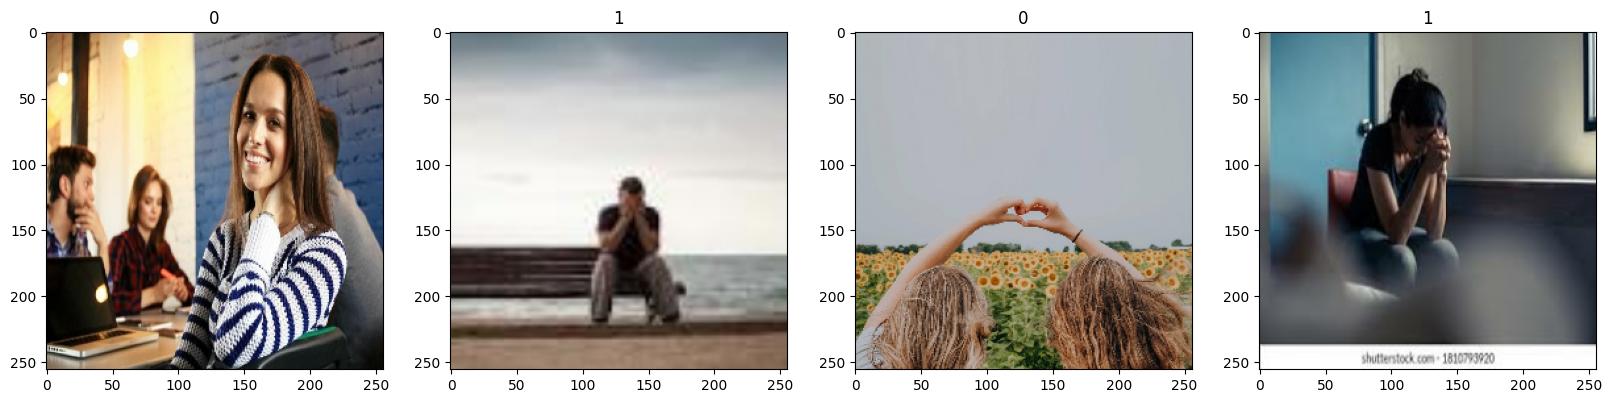

In [18]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [19]:
# sad 1 , happy 0

### 6. Preprocessing Data

### 6.1 Scaling Data

In [20]:
data = data.map(lambda x,y:(x/255, y))

### 6.2 Splitting the Data

In [21]:
len(data)

12

In [22]:
train_size = int(len(data)*0.7)
val_size = int(len(data)*0.2)
test_size = int(len(data)*0.2)

In [23]:
print(train_size, val_size, test_size)

8 2 2


In [24]:
# take and skip are available under the tensorflow dataset
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

### 7. Deep Model

### 7.1 Build model 

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [26]:
model = Sequential()

In [27]:
# 16 filters of size 3*3 with stribe 1 
# max pooling from each (2*2) takes the maximum value this way condenses the image
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1, activation="relu"))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1, activation = "relu"))
model.add(MaxPooling2D())

# flatten (n,m,d) data into n*m*d number of 1 dimensional data
model.add(Flatten())

model.add(Dense(256, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

In [28]:
model.compile("adam", loss=tf.losses.BinaryCrossentropy(), metrics = ["accuracy"])

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

### 8. Training the Model

In [30]:
logdir = "Logs"

In [31]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [32]:
hist = model.fit(train, epochs=20, validation_data = val, callbacks=[tensorboard_callback])

Epoch 1/20


8/8 [==============================] - 16s 1s/step - loss: 1.1047 - accuracy: 0.5117 - val_loss: 0.6761 - val_accuracy: 0.6562
Epoch 2/20
8/8 [==============================] - 9s 924ms/step - loss: 0.6684 - accuracy: 0.6445 - val_loss: 0.6430 - val_accuracy: 0.7812
Epoch 3/20
8/8 [==============================] - 9s 870ms/step - loss: 0.5993 - accuracy: 0.7500 - val_loss: 0.5449 - val_accuracy: 0.6875
Epoch 4/20
8/8 [==============================] - 9s 873ms/step - loss: 0.4827 - accuracy: 0.7695 - val_loss: 0.3912 - val_accuracy: 0.7656
Epoch 5/20
8/8 [==============================] - 10s 928ms/step - loss: 0.3937 - accuracy: 0.8242 - val_loss: 0.2809 - val_accuracy: 0.9531
Epoch 6/20
8/8 [==============================] - 9s 915ms/step - loss: 0.2955 - accuracy: 0.8984 - val_loss: 0.4878 - val_accuracy: 0.7188
Epoch 7/20
8/8 [==============================] - 9s 886ms/step - loss: 0.2297 - accuracy: 0.9258 - val_loss: 0.2036 - val_accuracy: 0.9375
Epoch 8/20
8/8 [===

In [33]:
hist.history

{'loss': [1.1047134399414062,
  0.6684165000915527,
  0.5993281602859497,
  0.48272955417633057,
  0.39370715618133545,
  0.29549193382263184,
  0.22967441380023956,
  0.17120935022830963,
  0.13723412156105042,
  0.08125558495521545,
  0.07945091277360916,
  0.02965473383665085,
  0.01630224846303463,
  0.011959204450249672,
  0.014547084458172321,
  0.008852649480104446,
  0.029160335659980774,
  0.021679433062672615,
  0.008570348843932152,
  0.06360071897506714],
 'accuracy': [0.51171875,
  0.64453125,
  0.75,
  0.76953125,
  0.82421875,
  0.8984375,
  0.92578125,
  0.94140625,
  0.94921875,
  0.98046875,
  0.96875,
  0.99609375,
  1.0,
  1.0,
  0.99609375,
  0.99609375,
  0.99609375,
  0.98828125,
  1.0,
  0.97265625],
 'val_loss': [0.6760857701301575,
  0.6430234909057617,
  0.5449294447898865,
  0.3912394642829895,
  0.2808874845504761,
  0.4877634048461914,
  0.20356324315071106,
  0.18372701108455658,
  0.11113549768924713,
  0.06761428713798523,
  0.046512313187122345,
  0.01

PLot Performance

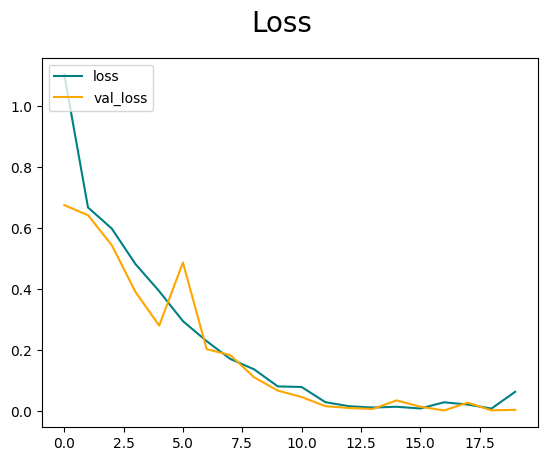

In [34]:
fig = plt.figure()
plt.plot(hist.history['loss'], color = 'teal', label = 'loss')
plt.plot(hist.history['val_loss'], color = "orange", label = "val_loss")
fig.suptitle('Loss', fontsize = 20)
plt.legend(loc="upper left")
plt.show()

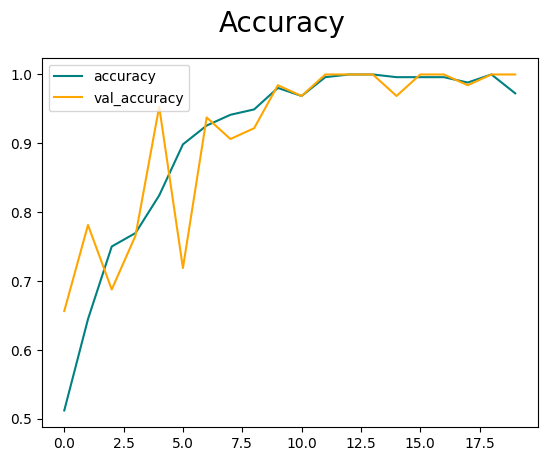

In [35]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color = 'teal', label = 'accuracy')
plt.plot(hist.history['val_accuracy'], color = "orange", label = "val_accuracy")
fig.suptitle('Accuracy', fontsize = 20)
plt.legend(loc="upper left")
plt.show()

### 9. Evaluating Performance

### 9.1 Evaluate

In [36]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [37]:
precision = Precision()
recall = Recall()
accuracy = BinaryAccuracy()

In [38]:
for batch in test.as_numpy_iterator():
    X,y = batch
    yhat = model.predict(X)
    precision.update_state(y,yhat)
    recall.update_state(y,yhat)
    accuracy.update_state(y,yhat)


1/1 [==============================] - 0s 423ms/step


In [39]:
print(f"Precision:{precision.result().numpy()}")
print(f"Recall:{recall.result().numpy()}")
print(f"Accuracy:{accuracy.result().numpy()}")

Precision:1.0
Recall:1.0
Accuracy:1.0


### 9.2 Test

In [40]:
import cv2

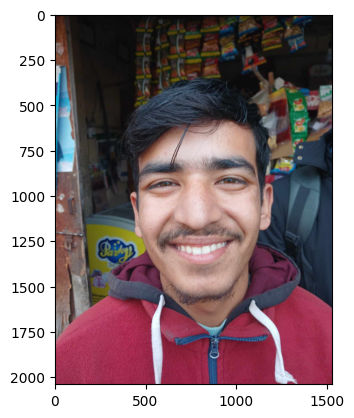

In [65]:
img = cv2.imread("Happyface.jpg")
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

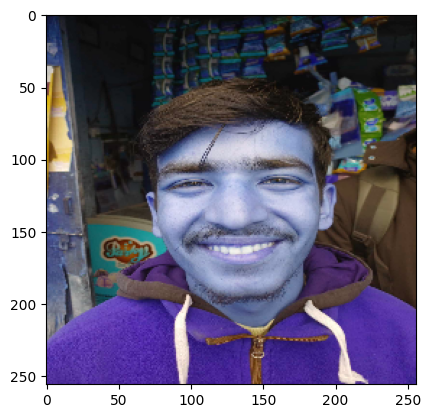

In [66]:
resize = tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [67]:
np.expand_dims(resize,0)

array([[[[ 20.732239,  22.732239,  46.73224 ],
         [ 18.949219,  20.949219,  44.94922 ],
         [ 22.160156,  25.042969,  49.04297 ],
         ...,
         [ 16.      ,  16.      ,  16.      ],
         [ 17.464844,  17.464844,  17.464844],
         [ 13.488281,  13.488281,  13.488281]],

        [[ 24.988281,  26.988281,  50.98828 ],
         [ 20.917969,  22.917969,  46.91797 ],
         [ 20.128906,  23.011719,  47.01172 ],
         ...,
         [ 16.      ,  16.      ,  16.      ],
         [ 17.464844,  17.464844,  17.464844],
         [ 13.488281,  13.488281,  13.488281]],

        [[ 21.023438,  25.023438,  53.023438],
         [ 22.      ,  26.      ,  54.      ],
         [ 22.      ,  26.      ,  54.441406],
         ...,
         [ 16.      ,  16.      ,  16.      ],
         [ 13.      ,  13.      ,  13.      ],
         [ 13.      ,  13.      ,  13.      ]],

        ...,

        [[ 77.64453 ,  42.64453 , 158.64453 ],
         [ 71.491394,  36.491394, 152.4914  ]

In [68]:
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 150ms/step


In [69]:
if yhat > 0.5:
    print("Predicted class is Happy.")
else:
    print("Predicted class is Sad.")

Predicted class is Happy.


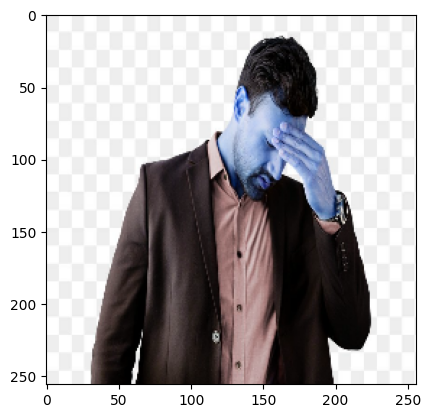

In [74]:
img2 = cv2.imread("Sadface.png")
plt.imshow(cv2.cvtColor(img2,cv2.COLOR_BGR2RGB))
resize2 = tf.image.resize(img2,(256,256))
plt.imshow(resize2.numpy().astype(int))
plt.show()


In [75]:
np.expand_dims(resize2,0)

array([[[[238.    , 238.    , 238.    ],
         [238.    , 238.    , 238.    ],
         [238.    , 238.    , 238.    ],
         ...,
         [238.6875, 238.6875, 238.6875],
         [237.375 , 237.375 , 237.375 ],
         [254.5625, 254.5625, 254.5625]],

        [[238.    , 238.    , 238.    ],
         [238.    , 238.    , 238.    ],
         [238.    , 238.    , 238.    ],
         ...,
         [238.6875, 238.6875, 238.6875],
         [237.375 , 237.375 , 237.375 ],
         [254.5625, 254.5625, 254.5625]],

        [[238.    , 238.    , 238.    ],
         [238.    , 238.    , 238.    ],
         [238.    , 238.    , 238.    ],
         ...,
         [238.6875, 238.6875, 238.6875],
         [237.375 , 237.375 , 237.375 ],
         [254.5625, 254.5625, 254.5625]],

        ...,

        [[238.    , 238.    , 238.    ],
         [238.    , 238.    , 238.    ],
         [238.    , 238.    , 238.    ],
         ...,
         [238.6875, 238.6875, 238.6875],
         [237.375 , 23

In [76]:
yhat2 = model.predict(np.expand_dims(resize2/255,0))

1/1 [==============================] - 0s 90ms/step


In [77]:
print(yhat2)

[[0.99999994]]
